### Importing Necessary Libraries

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [418]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')  
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### At first we hv to do non graphical analysis

In [364]:
df.shape

(158, 12)

In [224]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Observations :-
1. As the count values for all the columns is same it means that there is no null value present in the dataset.

2. mean value for 'Happiness Score', 'Trust' & 'Generosity' is greater than the median(ie 50%) it means that the data is right skewed in these columns.

3. mean value for 'economy' & 'family' is less than the median(ie 50%) it means that the data is left skewed.

4. As the there is not too much difference between the 75% & max value means outliers seems not present.

5. min values for 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity' is zero.

In [225]:
### Confirm skeweness

df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

### We can see that(as mension in above observations)data in 'Happiness Score', 'Trust' & 'Generosity' these columns are right skewed. 

In [226]:
## Checking null values

df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [227]:
## Checking all null values

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### No null values are present

In [228]:
### checking the datatypes of columns 

df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

#### Dataframe has two coulmns with 'object' datatype, one have int64 and remaining 9 are of float datatypes

1. Country,Region - object

2. Happiness Rank -  int64

3. Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual - float64
 
                       

In [229]:
### fetch out all the information about the dataframe 


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [230]:
 for i in df.columns:
        print(df[i].value_counts())
        print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

### WE have to predict the Happiness Score then the column 'Happiness Score' is our target variable

In [231]:
df.nunique().to_frame('No of unique values')

,No of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [232]:
df['Happiness Score'].nunique() 

157

### As the value counts for 'Happiness Score' is unique for almost all entries hence it is 'REGRESSION PROBLEM'

### For visusalisation purpose we have to remoove the object datatype coulmns from the given dataset
### The column 'Happiness Rank' having all the unique values so it is a good practice to remove this column  from the dataset

In [419]:
df1 = df.drop(columns = ['Country','Region','Happiness Rank'])
df1.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Checking outliers using box plot

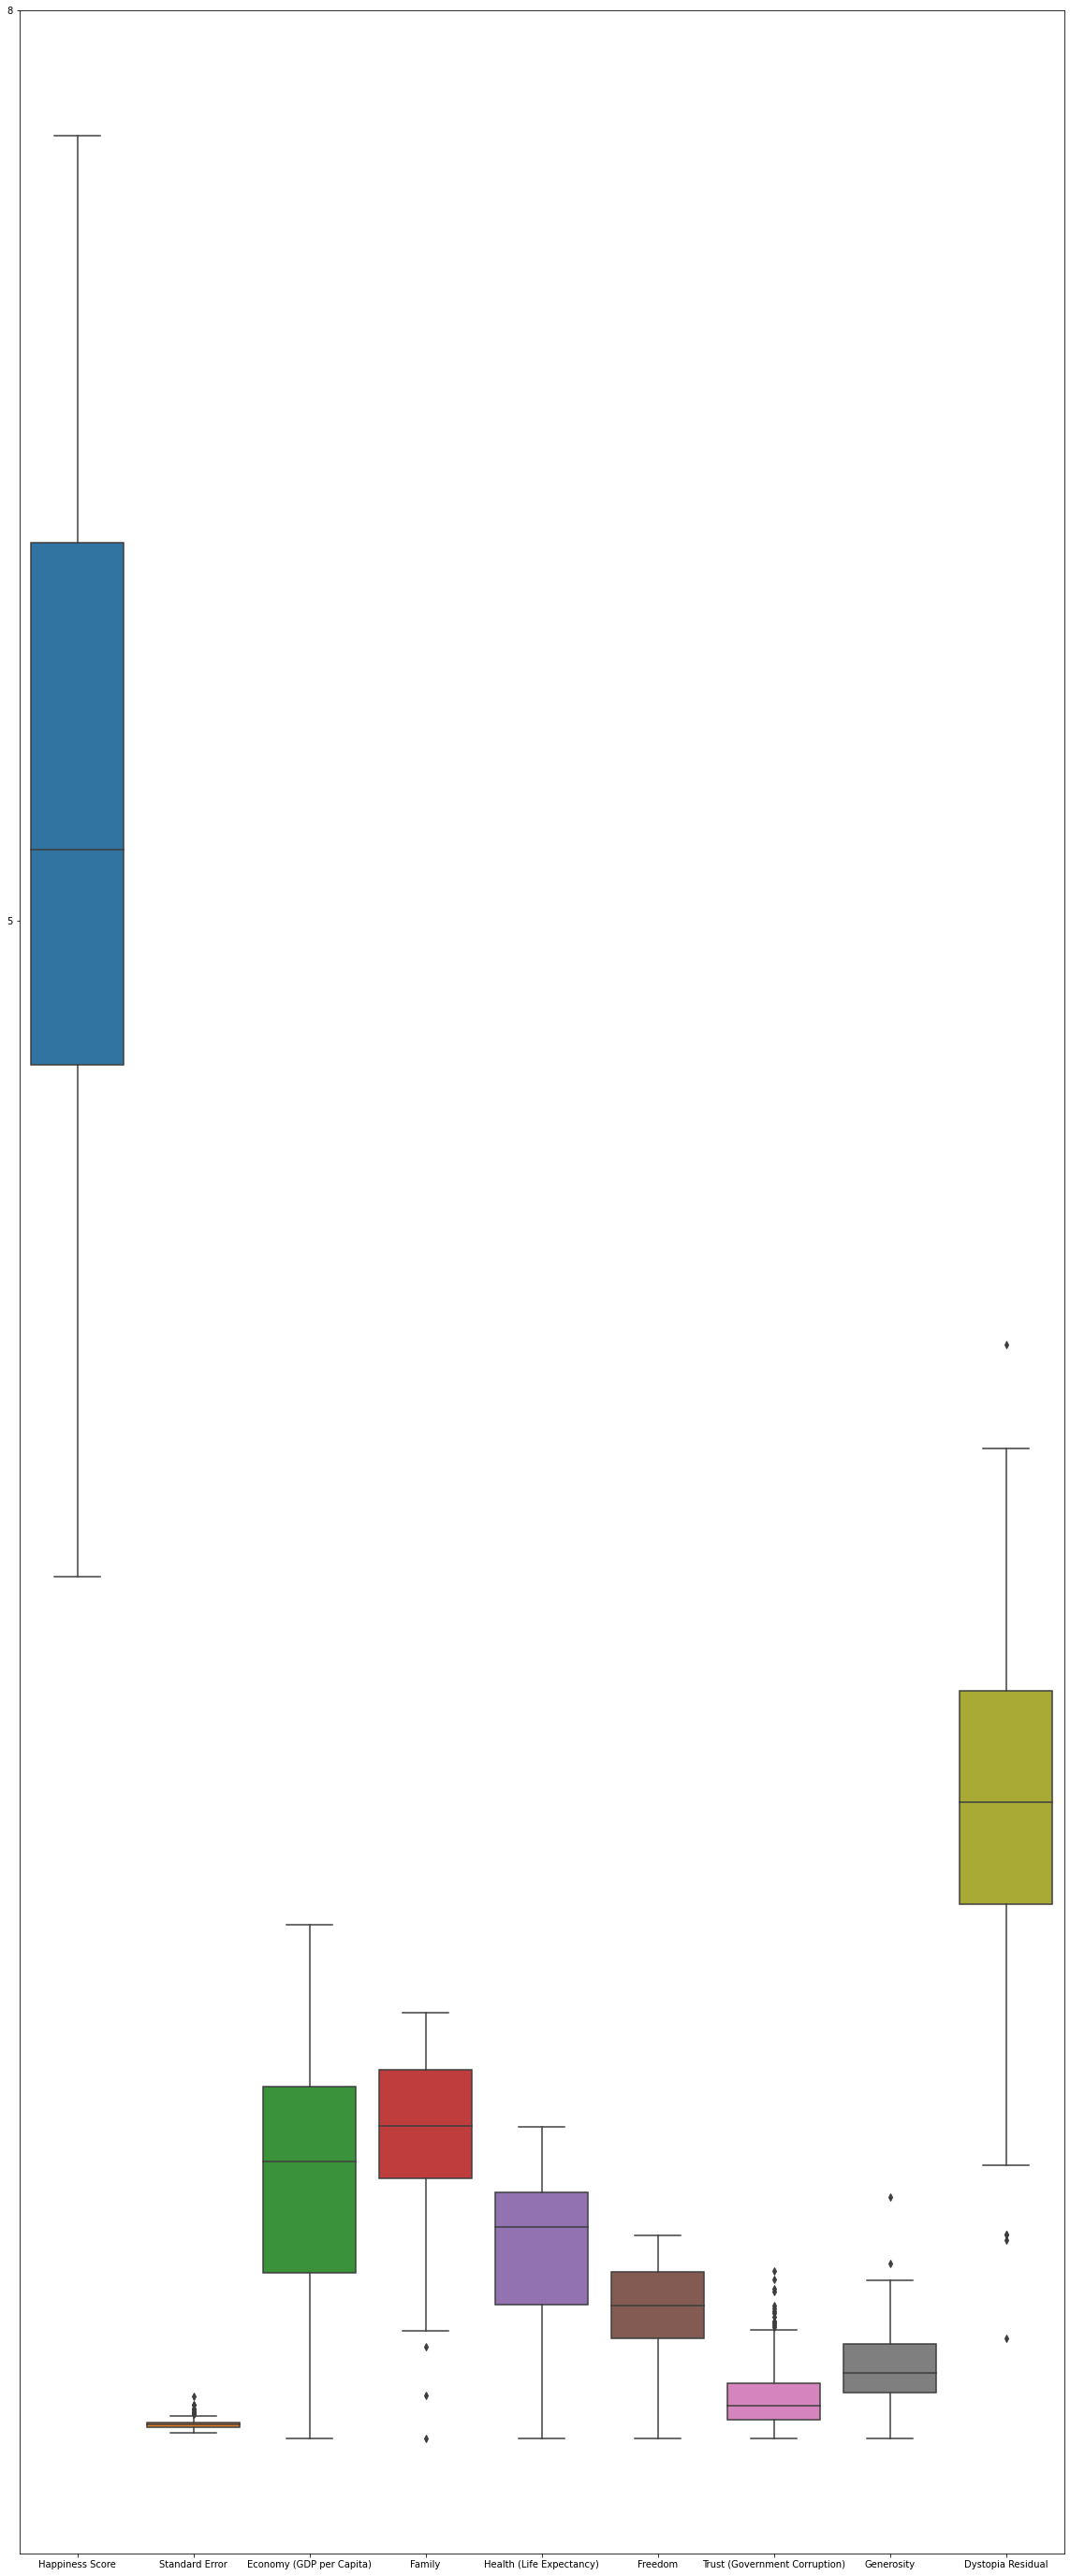

In [234]:

plt.figure(figsize=(20,50))     #5 is x axis measurement and 6 is of y

ax = sns.boxplot(data=df1)   

plt.yticks(range(5,10,3))     #range on y axis.. ticks - distance between two numbers 



plt.show()

### Lets first deal with skewenesspresent in the dataset

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

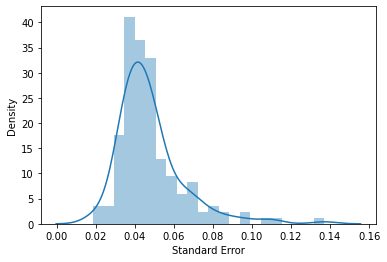

In [235]:

sns.distplot(df['Standard Error'])
        


### Removing the skeweness using log transform method

In [420]:
df['Standard Error'] = np.log(df['Standard Error'])
df['Standard Error'].skew()

0.48462318471794924

### skeweness is removed from 1.98 to 0.48

### Again check the skeweness

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

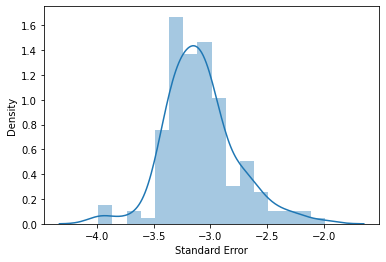

In [237]:
sns.distplot(df['Standard Error'])

### Now check the multicollinearity

In [238]:
df1.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


### Using heatmap

<AxesSubplot:>

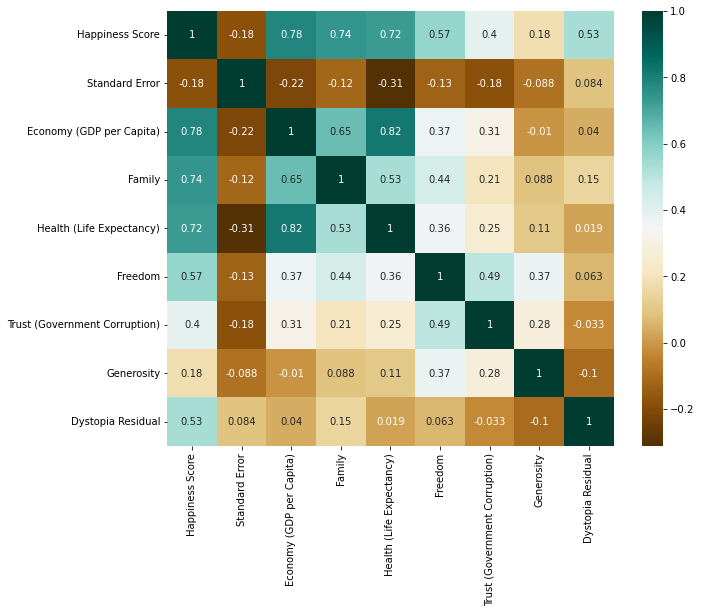

In [239]:

plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot= True, cmap='BrBG')

### distribution plot

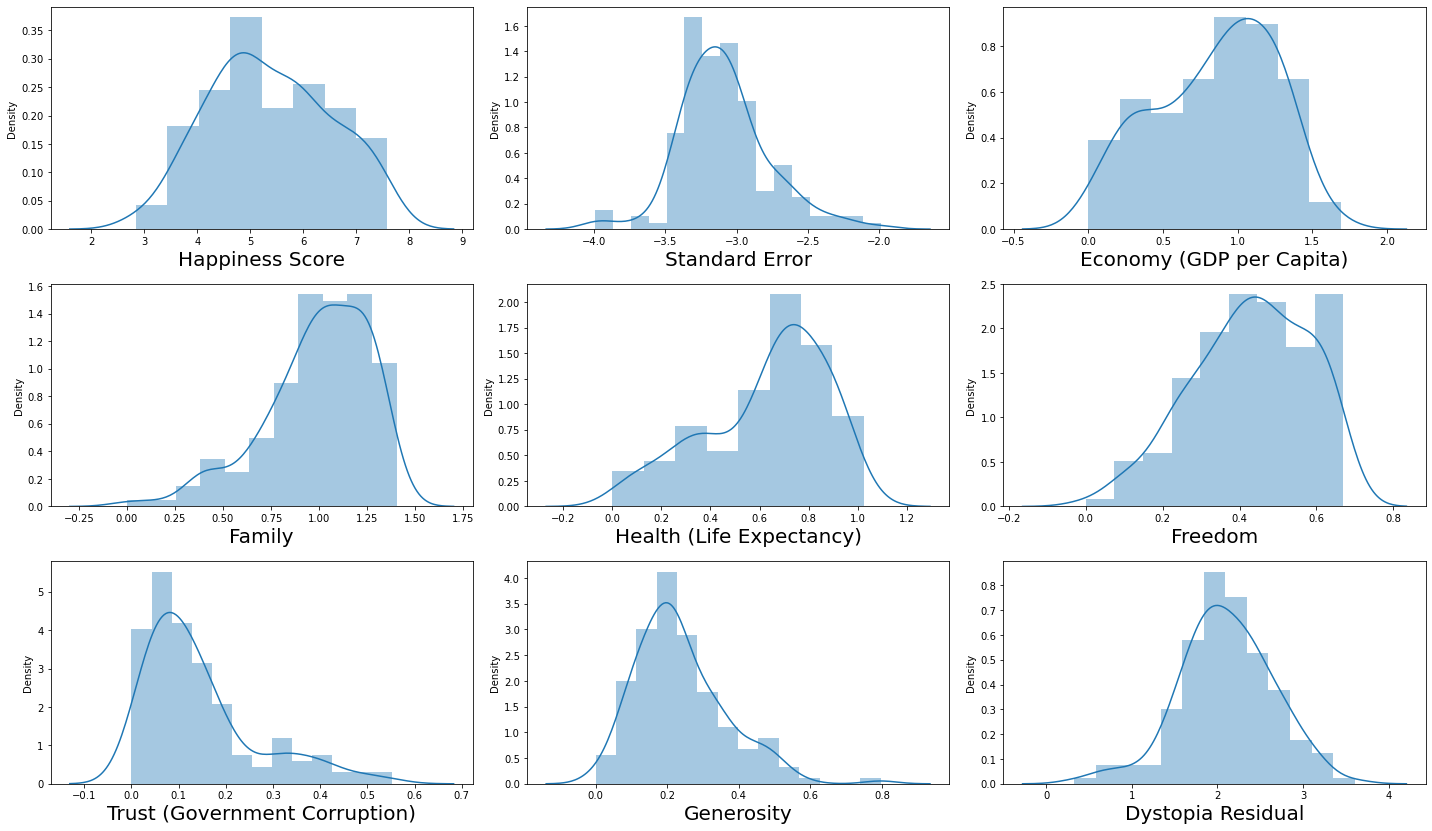

In [240]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in df1:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()    

### histograph

<AxesSubplot:ylabel='Frequency'>

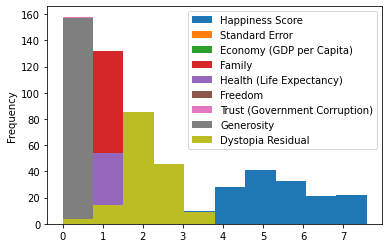

In [241]:
df1.plot(kind = 'hist')

### Using scatter matrix

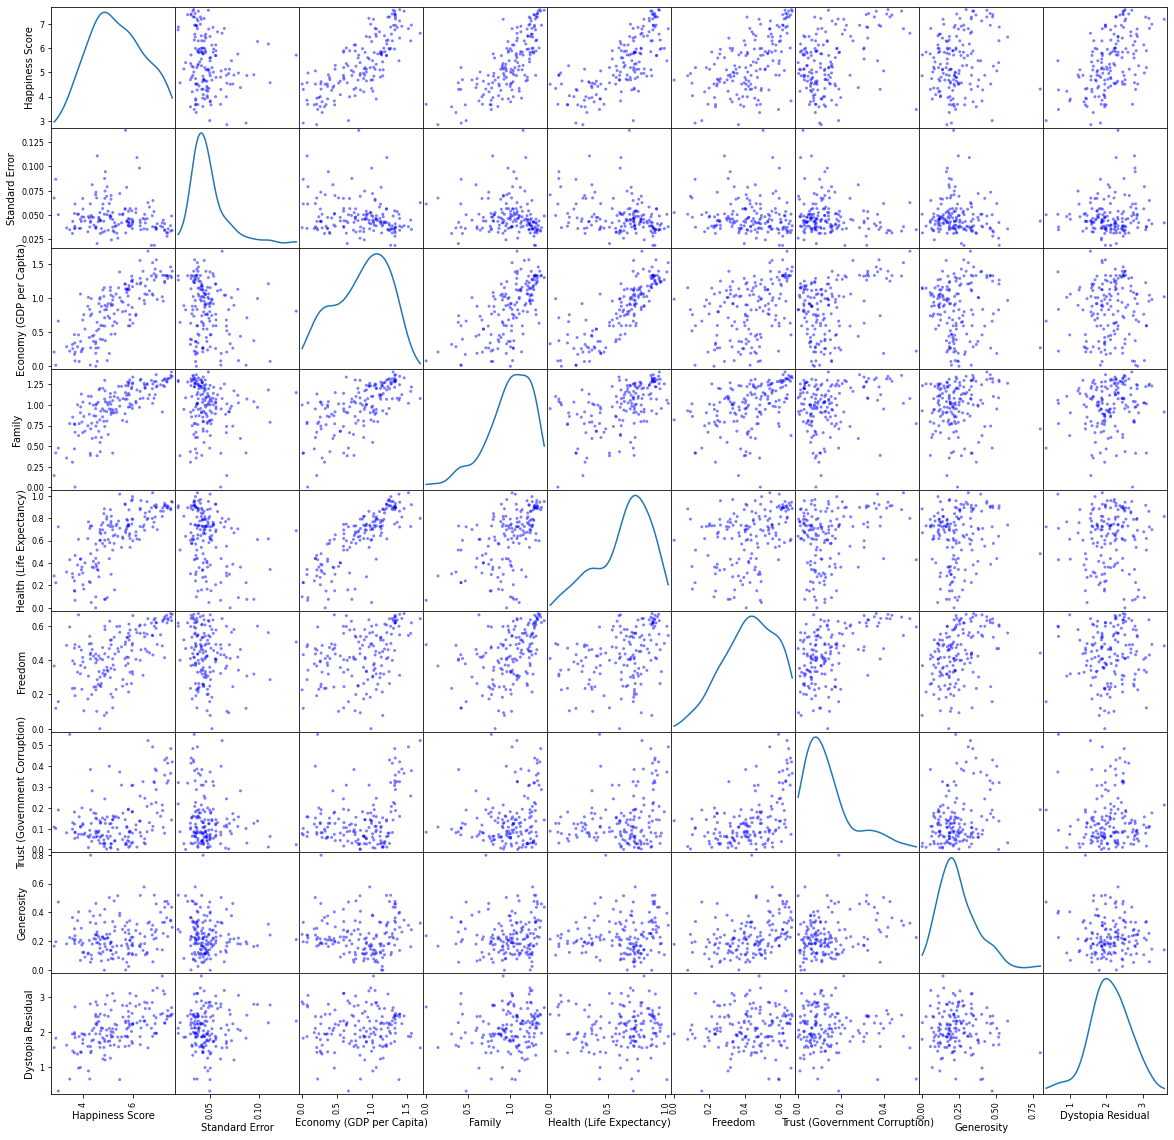

In [242]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1, figsize= (20,20), color = 'b', diagonal = 'kde')

plt.show()

### Checking Multicollinearity using Variance_inflation_factor

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df1.drop(columns =['Happiness Score'])
y = df1['Happiness Score']

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,7.166167,Standard Error
1,21.759914,Economy (GDP per Capita)
2,25.636995,Family
3,23.090959,Health (Life Expectancy)
4,15.880880,Freedom
5,3.497600,Trust (Government Corruption)
6,5.600094,Generosity
7,12.574726,Dystopia Residual


### Machine Learning Algorithms

### As a said it is a regression problem we have to use regression algorithm to predict 'Happiness Score'

### Linear Regression

In [421]:
# Data scaling..

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)


In [422]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=250)

In [423]:
regression = LinearRegression()

regression.fit(x_train, y_train) 

LinearRegression()

### Predict the Happiness Score given features

In [424]:
df1.tail(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [425]:
print('Happiness Score : ',regression.predict(scaler.transform([[0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302]])))


Happiness Score :  [2.9046054]


### Let's check how well model fits the train data/ how could model learned

In [426]:
regression.score(x_test,y_test)

0.9999999144471747

### Let's plot and visualize

In [427]:
y_pred = regression.predict(x_test)

y_pred

array([5.60460538, 5.99505696, 5.36034242, 3.58687818, 3.46486056,
       3.89643417, 6.86715375, 5.39871398, 4.29260217, 4.41930716,
       6.29814037, 6.32891138, 5.58864703, 5.98703801, 5.97526257,
       4.34999329, 5.85521962, 4.95939353, 5.21193584, 3.93081213,
       6.93733721, 4.36920872, 6.57504111, 5.83261323, 4.88450396,
       4.69407375, 3.34013206, 5.95959271, 4.87420938, 5.75438593,
       3.57462766, 7.2859632 , 7.36359388, 3.65507951, 4.51784291,
       4.57149959, 5.09753105, 4.79953417, 5.77041539, 4.78648058])

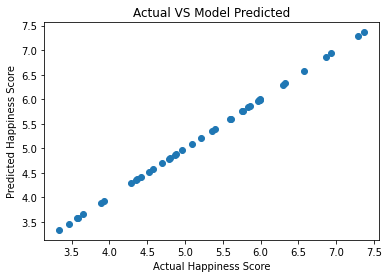

In [428]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual VS Model Predicted')
plt.show()

### Model Evaluation

In [429]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [430]:
y_pred = regression.predict(x_test)

In [431]:
# MAE

mean_absolute_error(y_test,y_pred)

0.00026633604363339724

In [432]:
# RMSE

np.sqrt(mean_absolute_error(y_test,y_pred))

0.01631980525721423

In [433]:
## R2 Score
print(r2_score(y_test,y_pred))

0.9999999144471747


### Regularization

In [144]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [145]:
lasscv = LassoCV(alphas = None, max_iter = 10, normalize = True)

lasscv.fit(x_train,y_train)

LassoCV(max_iter=10, normalize=True)

In [146]:
# best alpha parameter/best learning rate

alpha = lasscv.alpha_

alpha

8.309337490496508e-05

In [147]:
# now we hv best parameter let's use Lasso regression

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=8.309337490496508e-05)

In [148]:
#to understanding the test data

lasso_reg.score(x_test,y_test)

0.9999998939431096

### As ealier by using linear model its gives almost same score as 0.84 as lasso regr model

### By usisng lasso regr we are sure that our model is not over fitted

### Using Ridge regression model

In [251]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [252]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize=True) 
#We can keep alphas=none as same as LassoCV,but it is time wasting so it is better that  we keep the range

In [271]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [272]:
ridgecv.alpha_

0.001

In [255]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [256]:
ridge_model.score(x_test,y_test)

0.9999999068960823

### so, we can see by using different types of regularization, we still getting same r2 score. It means our model has been well trained over the training data and there is no overfiting

### Testing with other Regression Model

### DecisionTreeRegressor

In [257]:
from sklearn.tree import DecisionTreeRegressor

In [309]:
DTR = DecisionTreeRegressor()

In [336]:
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
y_pred = DTR.predict(x_test)

In [337]:
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 0.48207499999999986
Mean squared error : 0.3917602749999999
Root Mean Squared Error: 0.6259075610663286


In [338]:
## R2 Score
print(r2_score(y_test,y_pred))

0.6552373027080383


### Support Vector Regressor

In [262]:
from sklearn.svm import SVR

In [263]:
svr=SVR()

In [264]:
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
svr = svr.predict(x_test)

In [265]:
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 0.48469999999999996
Mean squared error : 0.3986188999999999
Root Mean Squared Error: 0.631362732508025


In [266]:
## R2 Score
print(r2_score(y_test,y_pred))

0.6492014736421279


### Random Forest Regressor

In [206]:
from sklearn.ensemble import RandomForestRegressor

In [207]:
RFR = RandomForestRegressor(n_estimators = 100 )

In [208]:
RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)
RFR = RFR.predict(x_test)

In [209]:
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 0.41187500000000005
Mean squared error : 0.282535125
Root Mean Squared Error: 0.5315403324301929


In [210]:
## R2 Score
print(r2_score(y_test,y_pred))

0.7540128767522042


### AdaBoostRegressor

In [365]:
from sklearn.ensemble import AdaBoostRegressor

In [411]:
ABR = AdaBoostRegressor()

In [412]:
ABR.fit(x_train,y_train)
ABR.score(x_train,y_train)
ABR = ABR.predict(x_test)

In [413]:
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 0.48207499999999986
Mean squared error : 0.3917602749999999
Root Mean Squared Error: 0.6259075610663286


In [414]:
## R2 Score
print(r2_score(y_test,y_pred))

0.6552373027080383


## Conclusion

## As shown above we get 99% r2 score from Linear Regression Model so it is a best model to find 'Happiness Score' for our given dataset